In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import unique
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [2]:
df = pd.read_csv('C:\\Users\\Suraj\Downloads\\bank-dataset.csv')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
df['y'].value_counts(normalize = True)*100

no     88.734583
yes    11.265417
Name: y, dtype: float64

In [11]:
df.shape

(41188, 21)

In [5]:
df.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [31]:
numerical_features = df.select_dtypes('float64')
categorical_features = df.select_dtypes('object').drop('y',axis = 1)

In [32]:
numerical_features.shape

(41188, 10)

In [33]:
categorical_features.shape

(41188, 10)

In [12]:
numerical_features

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73.0,334.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,383.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,189.0,2.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6
41186,44.0,442.0,1.0,999.0,0.0,-1.1,94.767,-50.8,1.028,4963.6


In [15]:
numerical_features.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

#### Numerical Input, Categorical Output

- how does each of the numerical predictor associate with target or contribute in predicting y

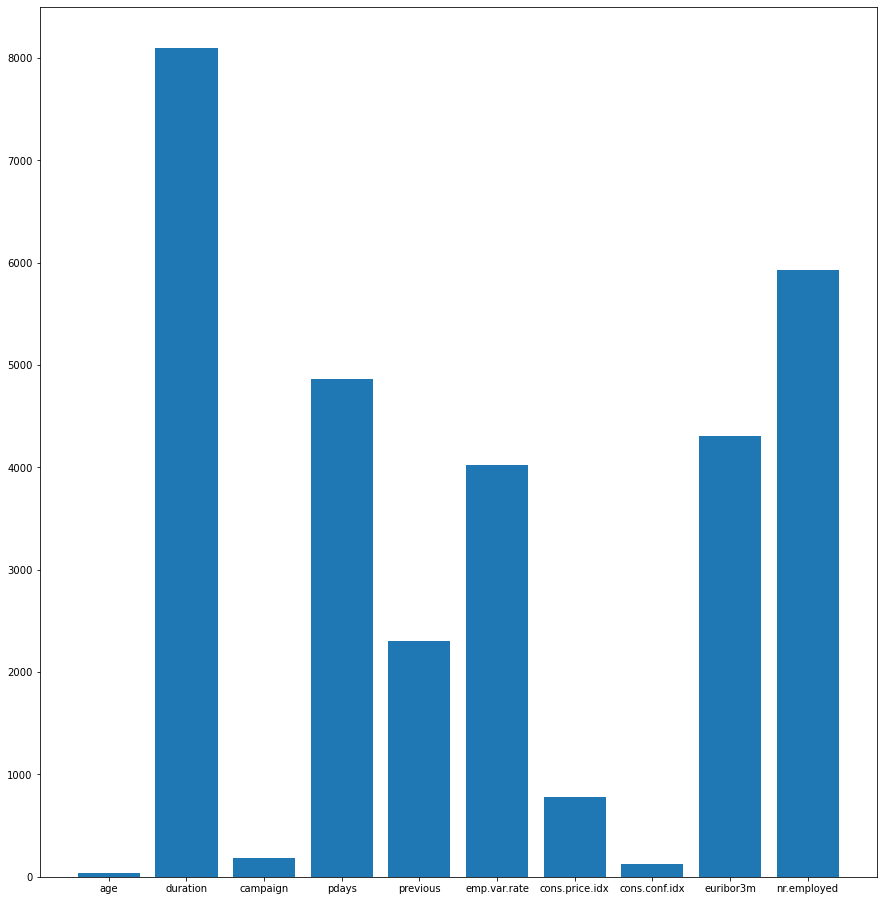

In [21]:
X = numerical_features
y = df['y'] 

fs = SelectKBest(score_func=f_classif, k='all')
X_selected = fs.fit_transform(X, y)

plt.figure(figsize = (15,16))
pyplot.bar([i for i in X.columns], fs.scores_)
pyplot.show()

- The predictors that contribute the most in predicting y are 'duration','pdays','previous','emp.var.rate','euribor3m','nr.employed'
- Let's check the performance including all numerical features and then compare it with performance of including only top 6 features.

#### With all the numerical features

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify = y)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)

print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

0.9092939691172186
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      9137
         yes       0.66      0.39      0.49      1160

    accuracy                           0.91     10297
   macro avg       0.80      0.68      0.72     10297
weighted avg       0.90      0.91      0.90     10297



#### With top6 best features

In [27]:
X_Best = numerical_features[['duration','pdays','previous','emp.var.rate','euribor3m','nr.employed']]
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X_Best,y,test_size=0.25,stratify = y)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)

print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

0.9062833835097601
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      9137
         yes       0.64      0.38      0.48      1160

    accuracy                           0.91     10297
   macro avg       0.78      0.68      0.71     10297
weighted avg       0.89      0.91      0.90     10297



- The precision and recall for 'yes' slightly decreased after including top6 best features. So its better we keep all numerical features

#### Categorical Input,Categorical Output

In [34]:
categorical_features.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [46]:
categorical_features.shape

(41188, 10)

In [37]:
from sklearn.preprocessing import OneHotEncoder

X = categorical_features
y = df['y'] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify = y)

ohe = OneHotEncoder(handle_unknown = 'ignore')
X_train = ohe.fit_transform(X_train).toarray()
X_test = ohe.transform(X_test).toarray()

Xtraindf = pd.DataFrame(X_train,columns = ohe.get_feature_names(X.columns))
Xtestdf = pd.DataFrame(X_test,columns = ohe.get_feature_names(X.columns))

In [38]:
Xtraindf.shape,Xtestdf.shape

((32950, 47), (8238, 47))

In [48]:
len(Xtraindf.columns)

47

In [41]:
catdf = pd.concat([Xtraindf,Xtestdf],axis = 0)

In [42]:
catdf.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
catdf.shape

(41188, 47)

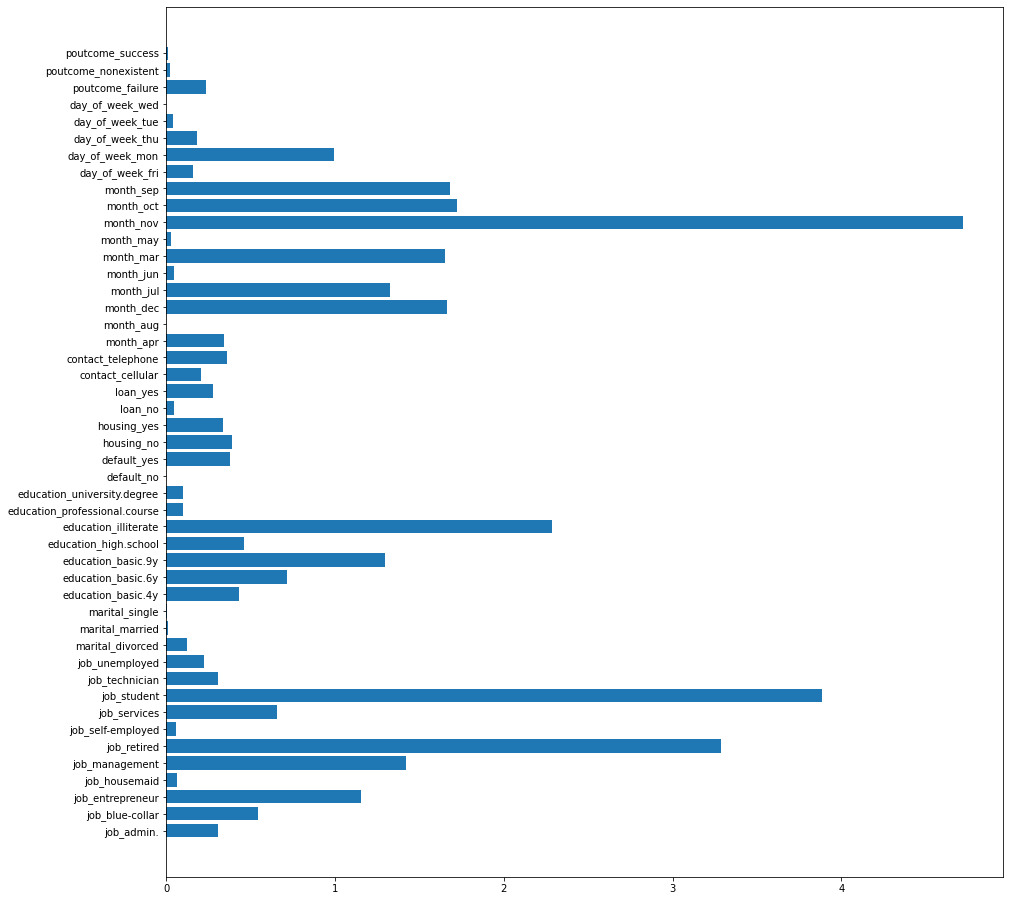

In [44]:
from sklearn.feature_selection import chi2

X = catdf
y = df['y']

fs = SelectKBest(score_func=chi2, k='all')
X_selected = fs.fit_transform(X, y)

plt.figure(figsize = (15,16))
pyplot.barh([i for i in X.columns], fs.scores_)
pyplot.show()

In [58]:
allfeatures.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_no', 'default_yes',
       'housing_no', 'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed

- Lets' concat all these features with numrical dataframe and test the performance and later choose top categorical features and compare both of the model performance

In [50]:
numerical_features.shape

(41188, 10)

In [51]:
catdf.shape

(41188, 47)

In [53]:
numerical_features.reset_index(drop=True, inplace=True)
catdf.reset_index(drop=True, inplace=True)

In [54]:
allfeatures = pd.concat([numerical_features,catdf],axis=1)

In [55]:
allfeatures.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [56]:
allfeatures.shape,y.shape

((41188, 57), (41188,))

In [57]:
X_train, X_test, y_train, y_test = train_test_split(allfeatures,y,test_size=0.20,stratify = y)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)

print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

0.9073804321437242
              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7310
         yes       0.65      0.38      0.48       928

    accuracy                           0.91      8238
   macro avg       0.79      0.68      0.71      8238
weighted avg       0.89      0.91      0.90      8238



#### With only important categorical features along with all numerical

In [59]:
X = allfeatures.drop(['poutcome_nonexistent', 'poutcome_success','day_of_week_tue', 'day_of_week_wed','marital_married', 'marital_single','month_may','month_aug'],axis = 1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,stratify = y)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train,y_train)
ypred = lr.predict(X_test)

print(accuracy_score(y_test,ypred))
print(classification_report(y_test,ypred))

0.909686817188638
              precision    recall  f1-score   support

          no       0.93      0.98      0.95      7310
         yes       0.67      0.39      0.49       928

    accuracy                           0.91      8238
   macro avg       0.80      0.68      0.72      8238
weighted avg       0.90      0.91      0.90      8238



#### Very bad recall for the TD=yes class

#### My Observation: When the data is highly imbalanced like in this case, even by selecting best predictors wouldn't help in predicting minority class as the recall is very low if you observe in all above cases. Precision is reasonable. Lets do what has to be done. I would love to try Threshold moving which gives weightage for minority class by altering the default 0.5 threshold. Lets do it !!

Best Threshold=0.093923, G-Mean=0.847


C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


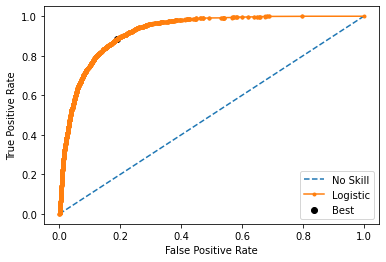

In [63]:
from sklearn.metrics import roc_curve
from numpy import sqrt
from numpy import argmax

X = allfeatures
y = df['y'].map({'no':0,'yes':1})

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression()
model.fit(trainX, trainy)

# predict probabilities
yhat = model.predict_proba(testX)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)

# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = argmax(gmeans)

print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

#### Youden’s J statistic

In [64]:
J = tpr-fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=0.092721


#### Let's use the new threshold

In [71]:
def changeyhat(yhat,best_thresh):
    return (yhat >= best_thresh).astype('int')

X = allfeatures
y = df['y'].map({'no':0,'yes':1})

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression(max_iter=1000)
model.fit(trainX, trainy)

# predict probabilities
yhat = model.predict_proba(testX)

# keep probabilities for the positive outcome only
yhat = yhat[:, 1]

yhat_change = changeyhat(yhat,best_thresh)

print(accuracy_score(testy,yhat_change))
print(classification_report(testy,yhat_change))

0.8196562105467612
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     18274
           1       0.37      0.88      0.52      2320

    accuracy                           0.82     20594
   macro avg       0.68      0.85      0.71     20594
weighted avg       0.91      0.82      0.85     20594



In [77]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(testy,yhat_change)

array([[14831,  3443],
       [  271,  2049]], dtype=int64)

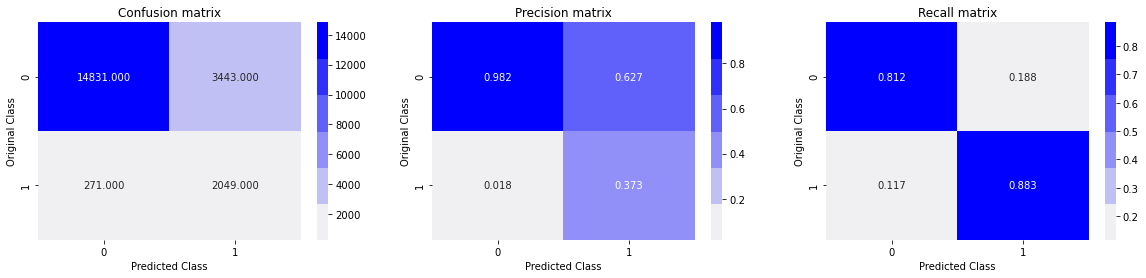

In [78]:
plot_confusion_matrix(testy,yhat_change)

In [79]:
print(classification_report(testy,yhat_change))

              precision    recall  f1-score   support

           0       0.98      0.81      0.89     18274
           1       0.37      0.88      0.52      2320

    accuracy                           0.82     20594
   macro avg       0.68      0.85      0.71     20594
weighted avg       0.91      0.82      0.85     20594



In [80]:
print(accuracy_score(testy,yhat_change))

0.8196562105467612


- Eventhough the accuracy has decreased from 90%(with default threshold) to 82%(new threshold) we can observe that the recall for positive-class(TD = yes) has increased from 39% to 88% which is a great improvement. However the precision for positive-class(TD = yes) has decreased from 67% to 37%. For negative-class(TD=no) its pretty good as it majority class. Now we need to make trade-off between precision and recall. What is more important to us (Precision Or Recall) ?. According to the business problem I guess we would not want to misclassify TD to 'no' when it is actually 'yes'. So we want less FN hence more recall.
- We could still try with more advance models like CART and ensembles, but I would stop here as of now.